# Data Preprocessing

Загружаем необходимые библиотеки. 
Импортируем наш датасет

In [40]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Importing the dataset
df = pd.read_csv('task2grin.csv', sep=',')

Имеем 5 переменных и 200 строк.

In [42]:
df

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Выведем статистику по числовым переменным.

In [43]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
df.dtypes

CustomerID        int64
Genre            object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

Проверка на наличие пропущенных значений указывает на их отсутствие. 

In [45]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
SpendingScore,0,0.0
AnnualIncome,0,0.0
Age,0,0.0
Genre,0,0.0
CustomerID,0,0.0


Осуществим работы с выбросами в числовых переменных.

In [46]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем  уже очищенные от выбросов переменные и повторно выведем статистику, которая говорит об отсутствии выбросов.

In [47]:
# Outliers
df = outliers(df)
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Построим графики распределения функций.

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


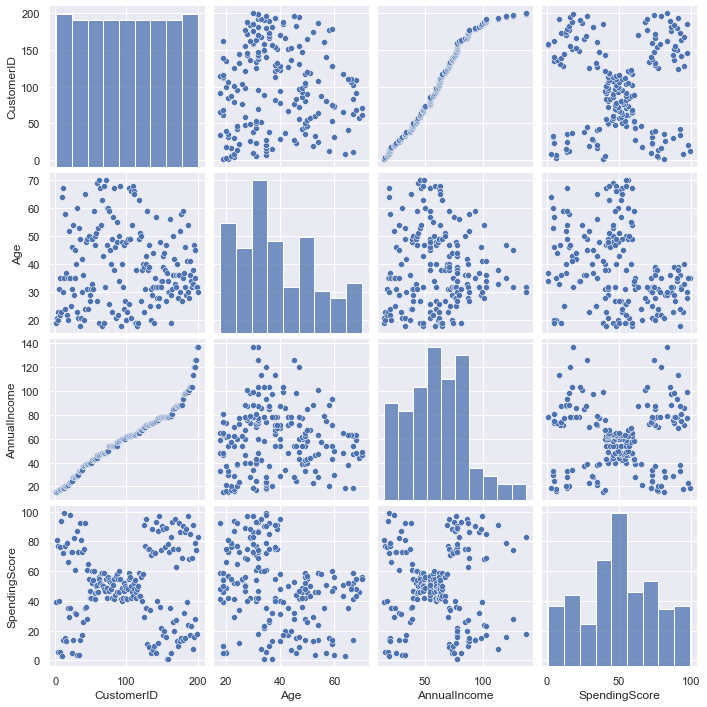

In [48]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Имеем подгоовленный набор данных, который можно далее использовать.

# K-Means Clustering¶

Перейдем к работе с алгоритмом К-средних. 

In [49]:
df

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Закодируем данные.

In [50]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [51]:
# Encoding categorical data
df = encoding_char(df)

In [52]:
df

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


Отшкалируем данные, переведя в диапазон от 0 до 1 с округлением. Вывыдем результат в таблицу.

In [53]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['CustomerID',"Genre", "Age","AnnualIncome","SpendingScore"]).round()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
195,1.0,1.0,0.0,1.0,1.0
196,1.0,1.0,1.0,1.0,0.0
197,1.0,0.0,0.0,1.0,1.0
198,1.0,0.0,0.0,1.0,0.0


Чтобы определиться с числом выделяемых кластеров, применим метод локтя, прогнав алгоритм в цикле от 1 до 8 кластеров.
На полученном графике видно, что наибольшая скорость падения наблюдается при выделении 2 кластеров.

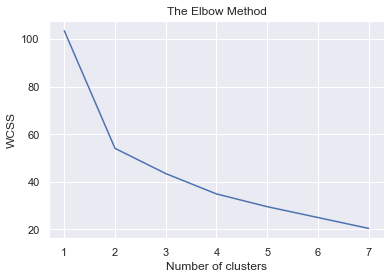

In [54]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Используем еще один метод силуэта, прогоним цикл от 2 до 8. Максимум показателя достигается на 2 кластерах.

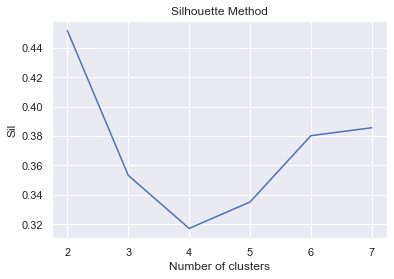

2:0.45157033770569127
3:0.3532046923192799
4:0.31714747009313293
5:0.3351318102555648
6:0.380218335223649
7:0.3856114871715836


In [55]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Применим метод К-средних, выделив 2 кластера. Выведем таблицу с ядрами кластеров, округлив их значения.

In [56]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ["CustomerID","Genre", "Age","AnnualIncome","SpendingScore"]).round(2)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,0.52,-0.0,0.42,0.39,0.48
1,0.49,1.0,0.39,0.36,0.52


Оставим в нашем наборе такие переменные: "Genre", "Age","AnnualIncome","SpendingScore"

In [57]:
# Less features
X = df[:, [1, 2, 3, 4]]

Итак, теперь применим алгоритм К-средних,но уже на отобранных данных. Проведем обучение на этом множестве и выведем ядра кластеров.

In [58]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ["Genre", "Age","AnnualIncome","SpendingScore"]).round(2)

,Genre,Age,AnnualIncome,SpendingScore
0,-0.0,0.42,0.39,0.48
1,1.0,0.39,0.36,0.52


Мы получили некую базу для дальнейшего построения нейронной сети для задачи кластеризации.

# SOM

Для работы с НС Кохонена необходимо предустановить библиотеку SimpSOM.
Теперь переходим к построению базовой сетки. Т.к. наша выборка содержит 200 записей, то размерность для сетки зададим 10х20, следующий параметр - отобранный мной набор данных для обучения. 
Обучение будем проводить с желаемой фиксацией потерь равной 1% в течение 1000 итераций.

In [59]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 20, X, PBC=True)
net.train(0.01, 1000)
#net.save(‘filename_weights

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


Итак, наша сеть обучилась, теперь построим набор карт по столбцам и проведем их совмесный анализ.
0-й кластер:  мужчины среднего возраста с более высоким доходом и оценкой расходов ниже среднего.
1-й кластер:  женщины среднего возраста с  менее высоким доходом и более высокой оценкойрасходов.


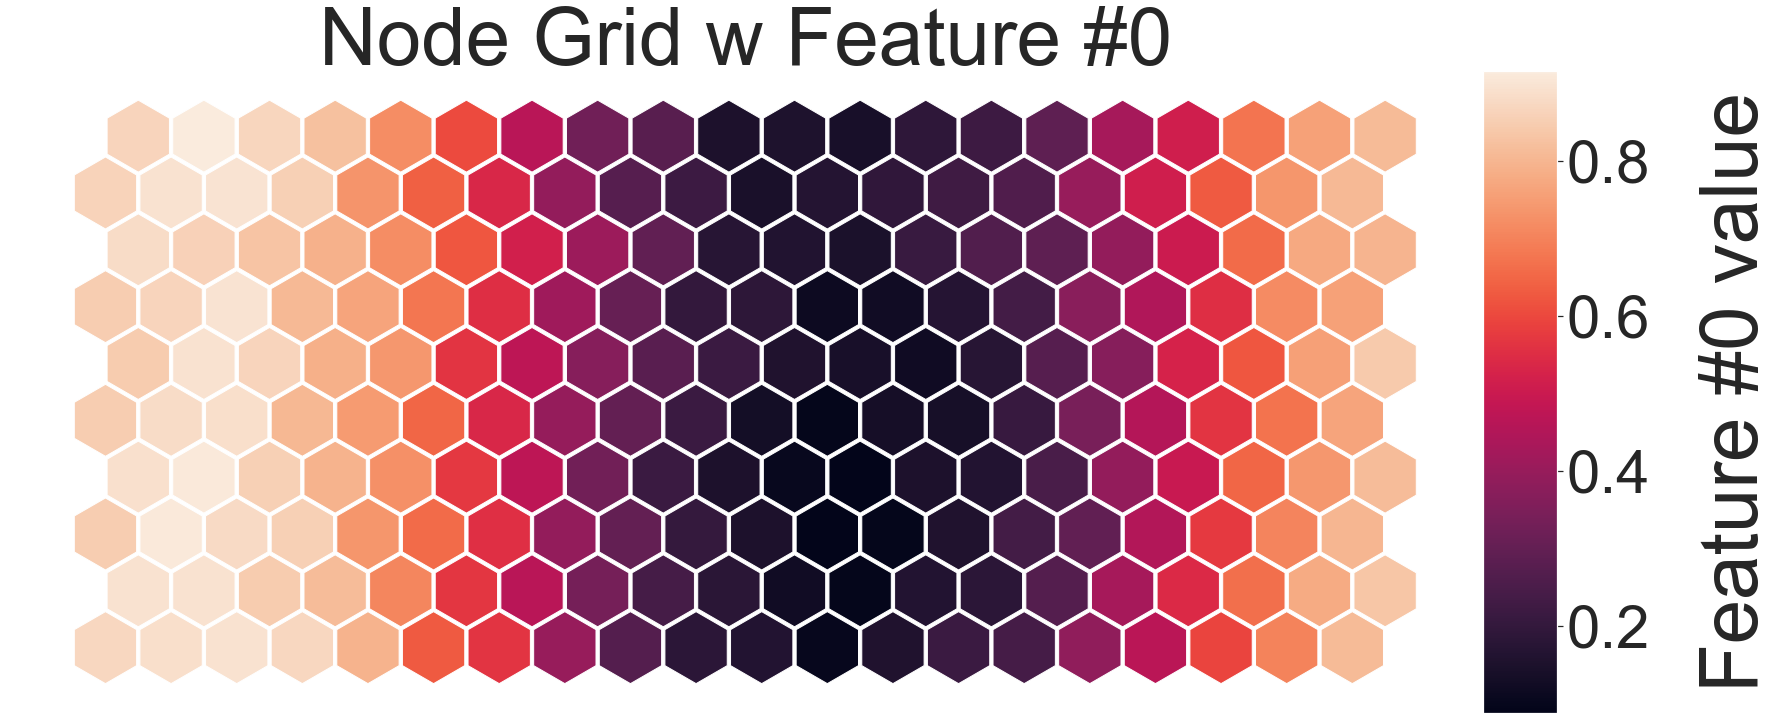

In [60]:
и net.nodes_graph(colnum=0)

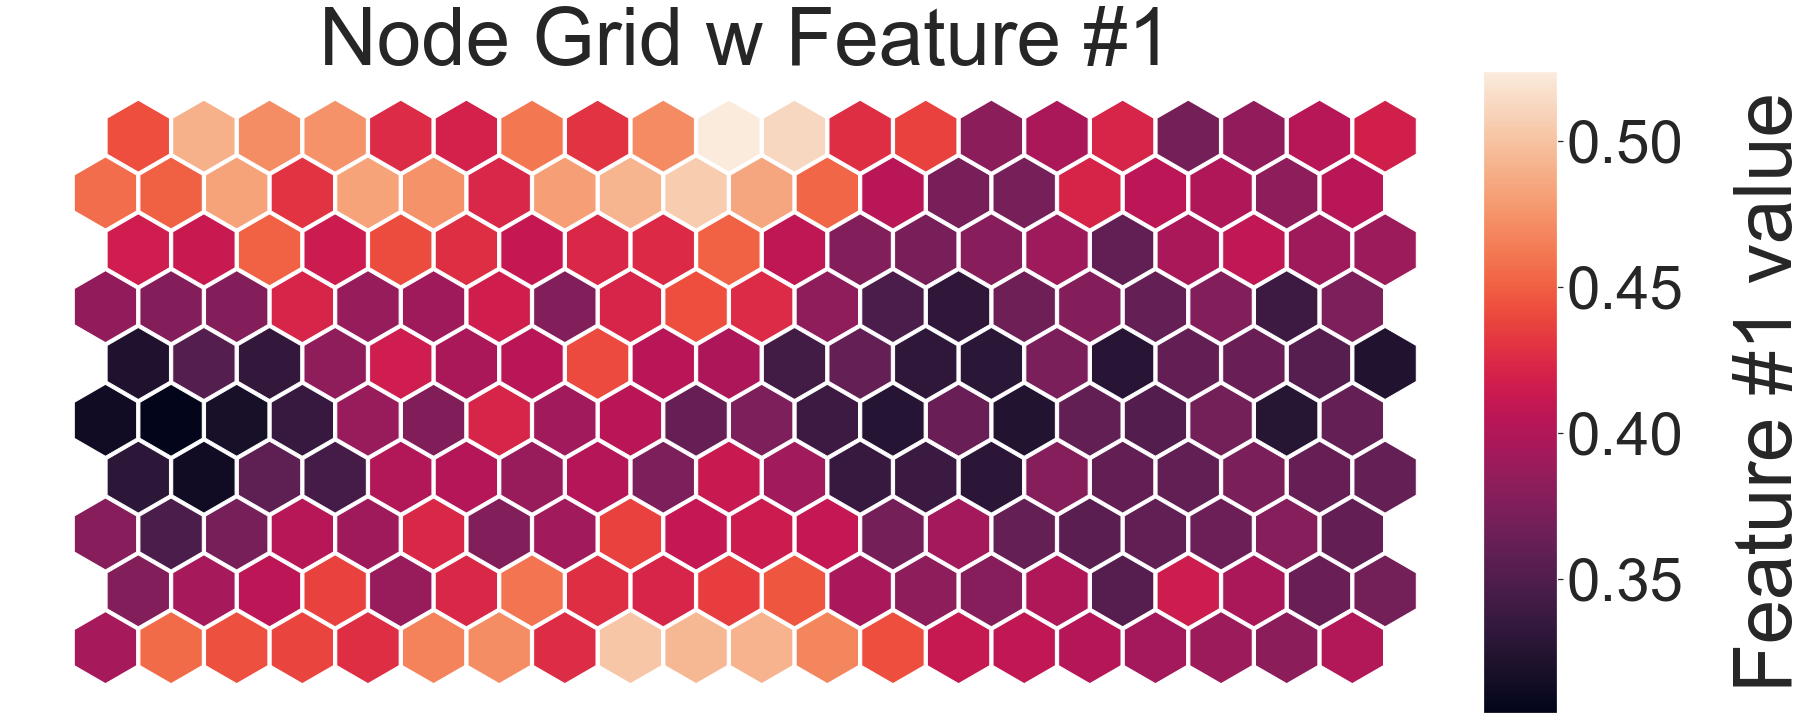

In [61]:
net.nodes_graph(colnum=1)

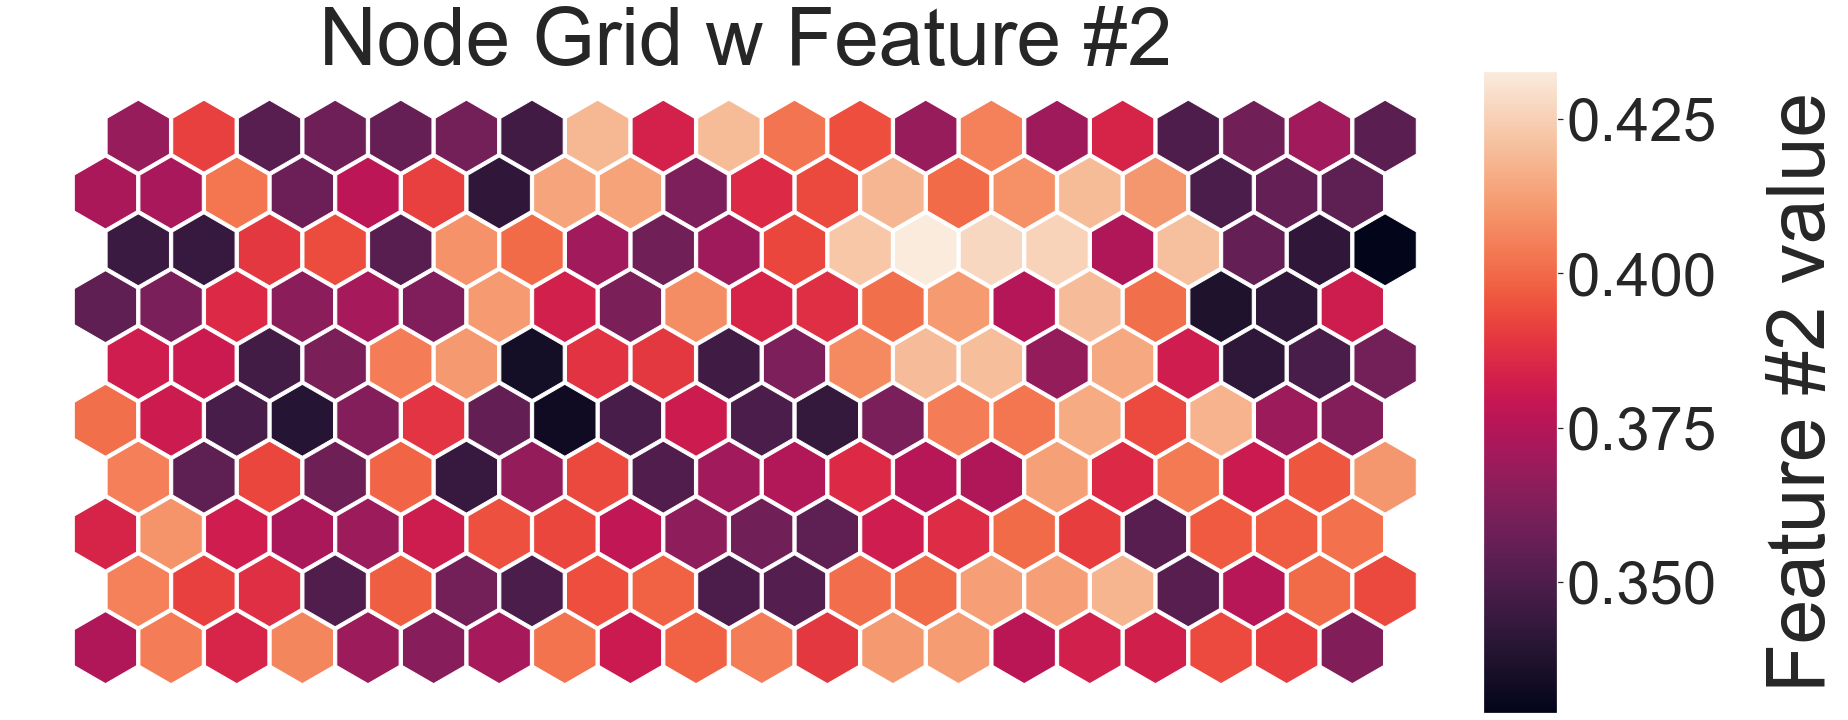

In [62]:
net.nodes_graph(colnum=2)

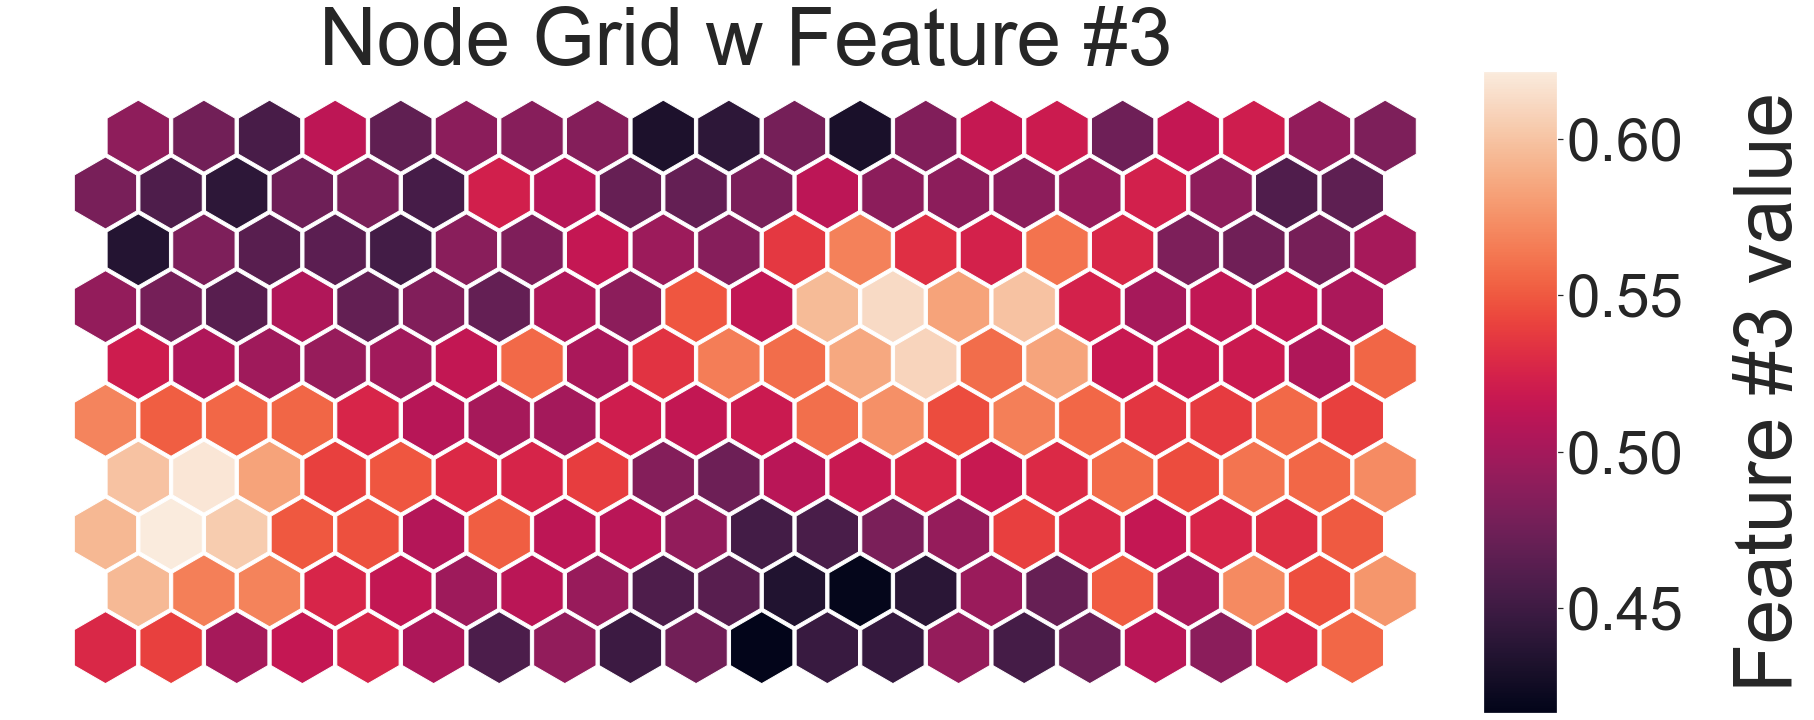

In [63]:
net.nodes_graph(colnum=3)

Построим карту удаленности весов, чтобы принять решение о количестве используемы кластеров.

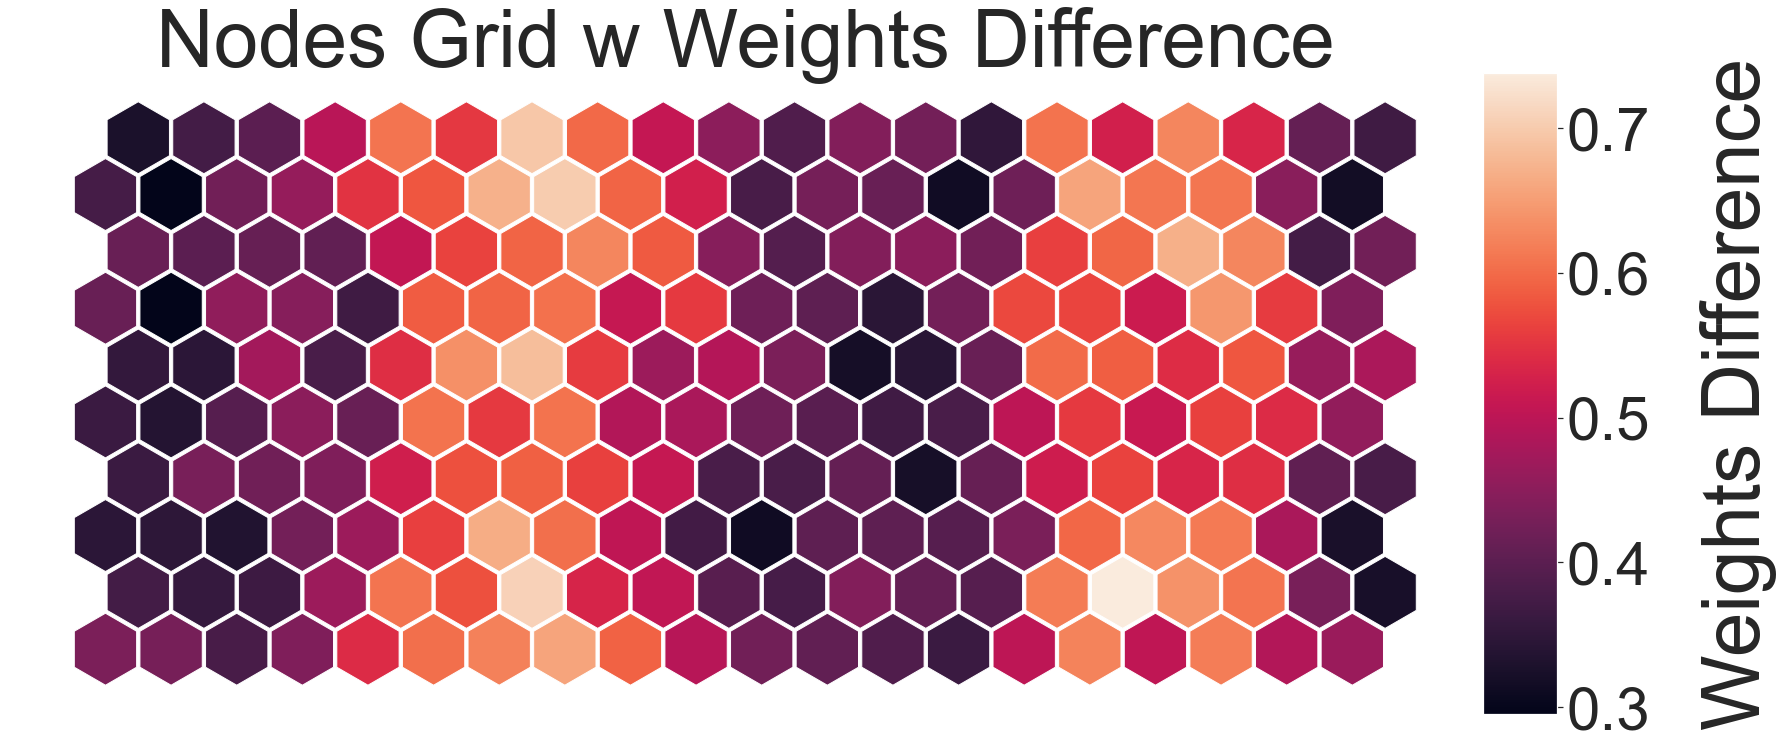

In [64]:
net.diff_graph()

Изобразим узлы карты, где видимо выделяются 2 кластера.

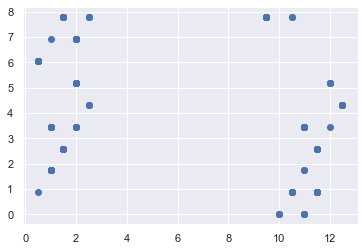

In [65]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Применим к карте алгоритм К-средних, выделив 2 кластера и подав на обучение нашу карту.

In [70]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)

Наконец сопоставим алгоритм К-средних с сетями Кохонена. Результаты пересекаются на 100%, что говорит о том, что мы можем выделять 2 кластера.

In [71]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

1.0